# Лабораторная работа 8

## 1. Выбор начальных условий

### a. набор данных

Был выбран датасет [Object Detection - Wildlife Dataset - YOLO Format](https://www.kaggle.com/datasets/ankanghosh651/object-detection-wildlife-dataset-yolo-format) (детекция 4 классов животных на фотографиях). Задача может иметь множество приложений в реальной жизни. Например, подобная система может использоваться для фотоловушек или систем слежения

In [ ]:
!pip install kaggle
!pip install pandas

In [1]:
!kaggle datasets download -d ankanghosh651/object-detection-wildlife-dataset-yolo-format -p data8 --unzip

Dataset URL: https://www.kaggle.com/datasets/ankanghosh651/object-detection-wildlife-dataset-yolo-format
License(s): MIT


In [1]:
!pip install ultralytics

  Using cached ultralytics-8.3.111-py3-none-any.whl.metadata (37 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
Using cached ultralytics-8.3.111-py3-none-any.whl (978 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached ultralytics_thop-2.0.14-py3-none-any.whl (26 kB)


### b. Метрики качества

Для детекции стандартны метрики mAP@0.5 и mAP@0.5:0.95 - их и будем использовать для оценки качества обучения модели

## 2. Создание бейзлайна и оценка качества


Импортируем YOLO из пакета ultralytics и инициализируем модель 11 версии формата nano:

In [4]:
from ultralytics import YOLO

yolo_cnn = YOLO('yolo11n.pt')

Запустим обучение. Данные для обучения хранятся в data.yaml:

```yaml
train: D:/Code/AI_labs_2/data8/final_data/train/images/
val: D:/Code/AI_labs_2/data8/final_data/valid/images/
test: D:/Code/AI_labs_2/data8/final_data/test/images/

nc: 4
names:
  0: buffalo
  1: elephant
  2: rhino
  3: zebra
```

In [5]:
res_yolo = yolo_cnn.train(
    data='data.yaml',
    epochs=30,
    imgsz=640,
    batch=16,
    name='wildlife_yolo'
)

Ultralytics 8.3.111  Python-3.13.2 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=wildlife_yolo2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

train: Scanning D:\Code\AI_labs_2\data8\final_data\train\labels.cache... 1203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1203/1203 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access  (ping: 0.00.0 ms, read: 1371.2937.2 MB/s, size: 135.6 KB)


val: Scanning D:\Code\AI_labs_2\data8\final_data\valid\labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]


Plotting labels to runs\detect\wildlife_yolo2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\wildlife_yolo2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.31G     0.8113       2.45      1.212         11        640: 100%|██████████| 76/76 [00:10<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.44it/s]

                   all        150        262      0.888      0.587      0.787      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.43G     0.9238      1.492      1.254         20        640: 100%|██████████| 76/76 [00:08<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.44it/s]

                   all        150        262      0.764      0.431      0.505      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.45G     0.9739      1.404      1.276         12        640: 100%|██████████| 76/76 [00:08<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.56it/s]

                   all        150        262      0.726       0.62      0.719      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.45G      0.956       1.31      1.275          5        640: 100%|██████████| 76/76 [00:08<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.49it/s]

                   all        150        262      0.745      0.682      0.767      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.45G     0.9274      1.224      1.256          9        640: 100%|██████████| 76/76 [00:08<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.15it/s]

                   all        150        262      0.801      0.732      0.808      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.45G     0.9281      1.139      1.248          9        640: 100%|██████████| 76/76 [00:08<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.66it/s]

                   all        150        262       0.79      0.771      0.832      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.45G     0.9013      1.069      1.239         21        640: 100%|██████████| 76/76 [00:08<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.38it/s]

                   all        150        262      0.863      0.761      0.892      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.45G     0.8681     0.9956      1.215         17        640: 100%|██████████| 76/76 [00:08<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.37it/s]

                   all        150        262      0.937      0.809      0.914      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.45G     0.8266     0.9281      1.193         26        640: 100%|██████████| 76/76 [00:08<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.62it/s]

                   all        150        262      0.887      0.849      0.915      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.45G     0.8226     0.9008      1.184         16        640: 100%|██████████| 76/76 [00:08<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.77it/s]

                   all        150        262      0.892      0.868      0.922      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.45G     0.8234     0.8707      1.184         12        640: 100%|██████████| 76/76 [00:08<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.61it/s]

                   all        150        262      0.919      0.857      0.944      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.45G     0.7865     0.8006      1.156         12        640: 100%|██████████| 76/76 [00:08<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.65it/s]

                   all        150        262      0.927       0.91      0.962      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.45G     0.7849     0.7785      1.161         12        640: 100%|██████████| 76/76 [00:08<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.58it/s]

                   all        150        262       0.93       0.86      0.939      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.45G     0.7835      0.791      1.152         18        640: 100%|██████████| 76/76 [00:09<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.11it/s]

                   all        150        262      0.923       0.89      0.957      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.45G     0.7728     0.7668      1.143         13        640: 100%|██████████| 76/76 [00:09<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.24it/s]

                   all        150        262       0.94       0.89      0.956      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.45G     0.7434     0.7383      1.132         15        640: 100%|██████████| 76/76 [00:09<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.23it/s]

                   all        150        262      0.945      0.842      0.947      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.45G     0.7181     0.6982      1.123          6        640: 100%|██████████| 76/76 [00:08<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.49it/s]

                   all        150        262      0.899      0.917      0.953      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.45G     0.7212     0.6782      1.122         12        640: 100%|██████████| 76/76 [00:08<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.69it/s]

                   all        150        262      0.952      0.916      0.965      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.45G     0.7019     0.6712      1.109          8        640: 100%|██████████| 76/76 [00:08<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.67it/s]

                   all        150        262      0.964      0.902      0.963      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.45G     0.7135     0.6559      1.117         10        640: 100%|██████████| 76/76 [00:08<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.56it/s]

                   all        150        262      0.964      0.902       0.97      0.817


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.45G     0.6211     0.5916      1.049          4        640: 100%|██████████| 76/76 [00:08<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.83it/s]

                   all        150        262      0.916      0.869      0.932      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.45G     0.5975     0.5201      1.033          5        640: 100%|██████████| 76/76 [00:08<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.56it/s]

                   all        150        262      0.929      0.887      0.955       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.45G     0.5786     0.4854       1.02          5        640: 100%|██████████| 76/76 [00:08<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.75it/s]

                   all        150        262      0.953      0.894      0.956      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.45G     0.5624     0.4901      1.019          7        640: 100%|██████████| 76/76 [00:10<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.75it/s]

                   all        150        262      0.953      0.908      0.966      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.45G     0.5375     0.4595     0.9981          3        640: 100%|██████████| 76/76 [00:09<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.16it/s]

                   all        150        262      0.952      0.913      0.971      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.45G     0.5324      0.421     0.9863          7        640: 100%|██████████| 76/76 [00:09<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.52it/s]

                   all        150        262      0.953      0.911      0.965      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.45G     0.5186     0.4078     0.9777          4        640: 100%|██████████| 76/76 [00:08<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.61it/s]

                   all        150        262      0.942       0.91      0.965      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.45G     0.5032      0.399     0.9609          6        640: 100%|██████████| 76/76 [00:08<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.74it/s]

                   all        150        262      0.982      0.905      0.967      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.45G     0.4846     0.3861     0.9544          4        640: 100%|██████████| 76/76 [00:08<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.54it/s]

                   all        150        262      0.969      0.912      0.967      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.45G     0.4812     0.3687     0.9508          5        640: 100%|██████████| 76/76 [00:08<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.50it/s]

                   all        150        262      0.972      0.901       0.97      0.843



30 epochs completed in 0.092 hours.
Optimizer stripped from runs\detect\wildlife_yolo2\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\wildlife_yolo2\weights\best.pt, 5.5MB

Validating runs\detect\wildlife_yolo2\weights\best.pt...
Ultralytics 8.3.111  Python-3.13.2 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]


                   all        150        262      0.969      0.912      0.967      0.846
               buffalo         38         60       0.95      0.867      0.931      0.797
              elephant         43         83      0.987      0.931      0.985      0.845
                 rhino         42         58      0.983      0.981      0.994      0.933
                 zebra         28         61      0.955      0.869      0.958      0.807
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\wildlife_yolo2


Получаем очень хорошие результаты после 30 эпох:

mAP50 = 0.967 \
mAP50-96 = 0.846 

Yolo так же генерирует информацию об обучении. Посмотрим на confusion matrix, график побучения и валидационный батч:

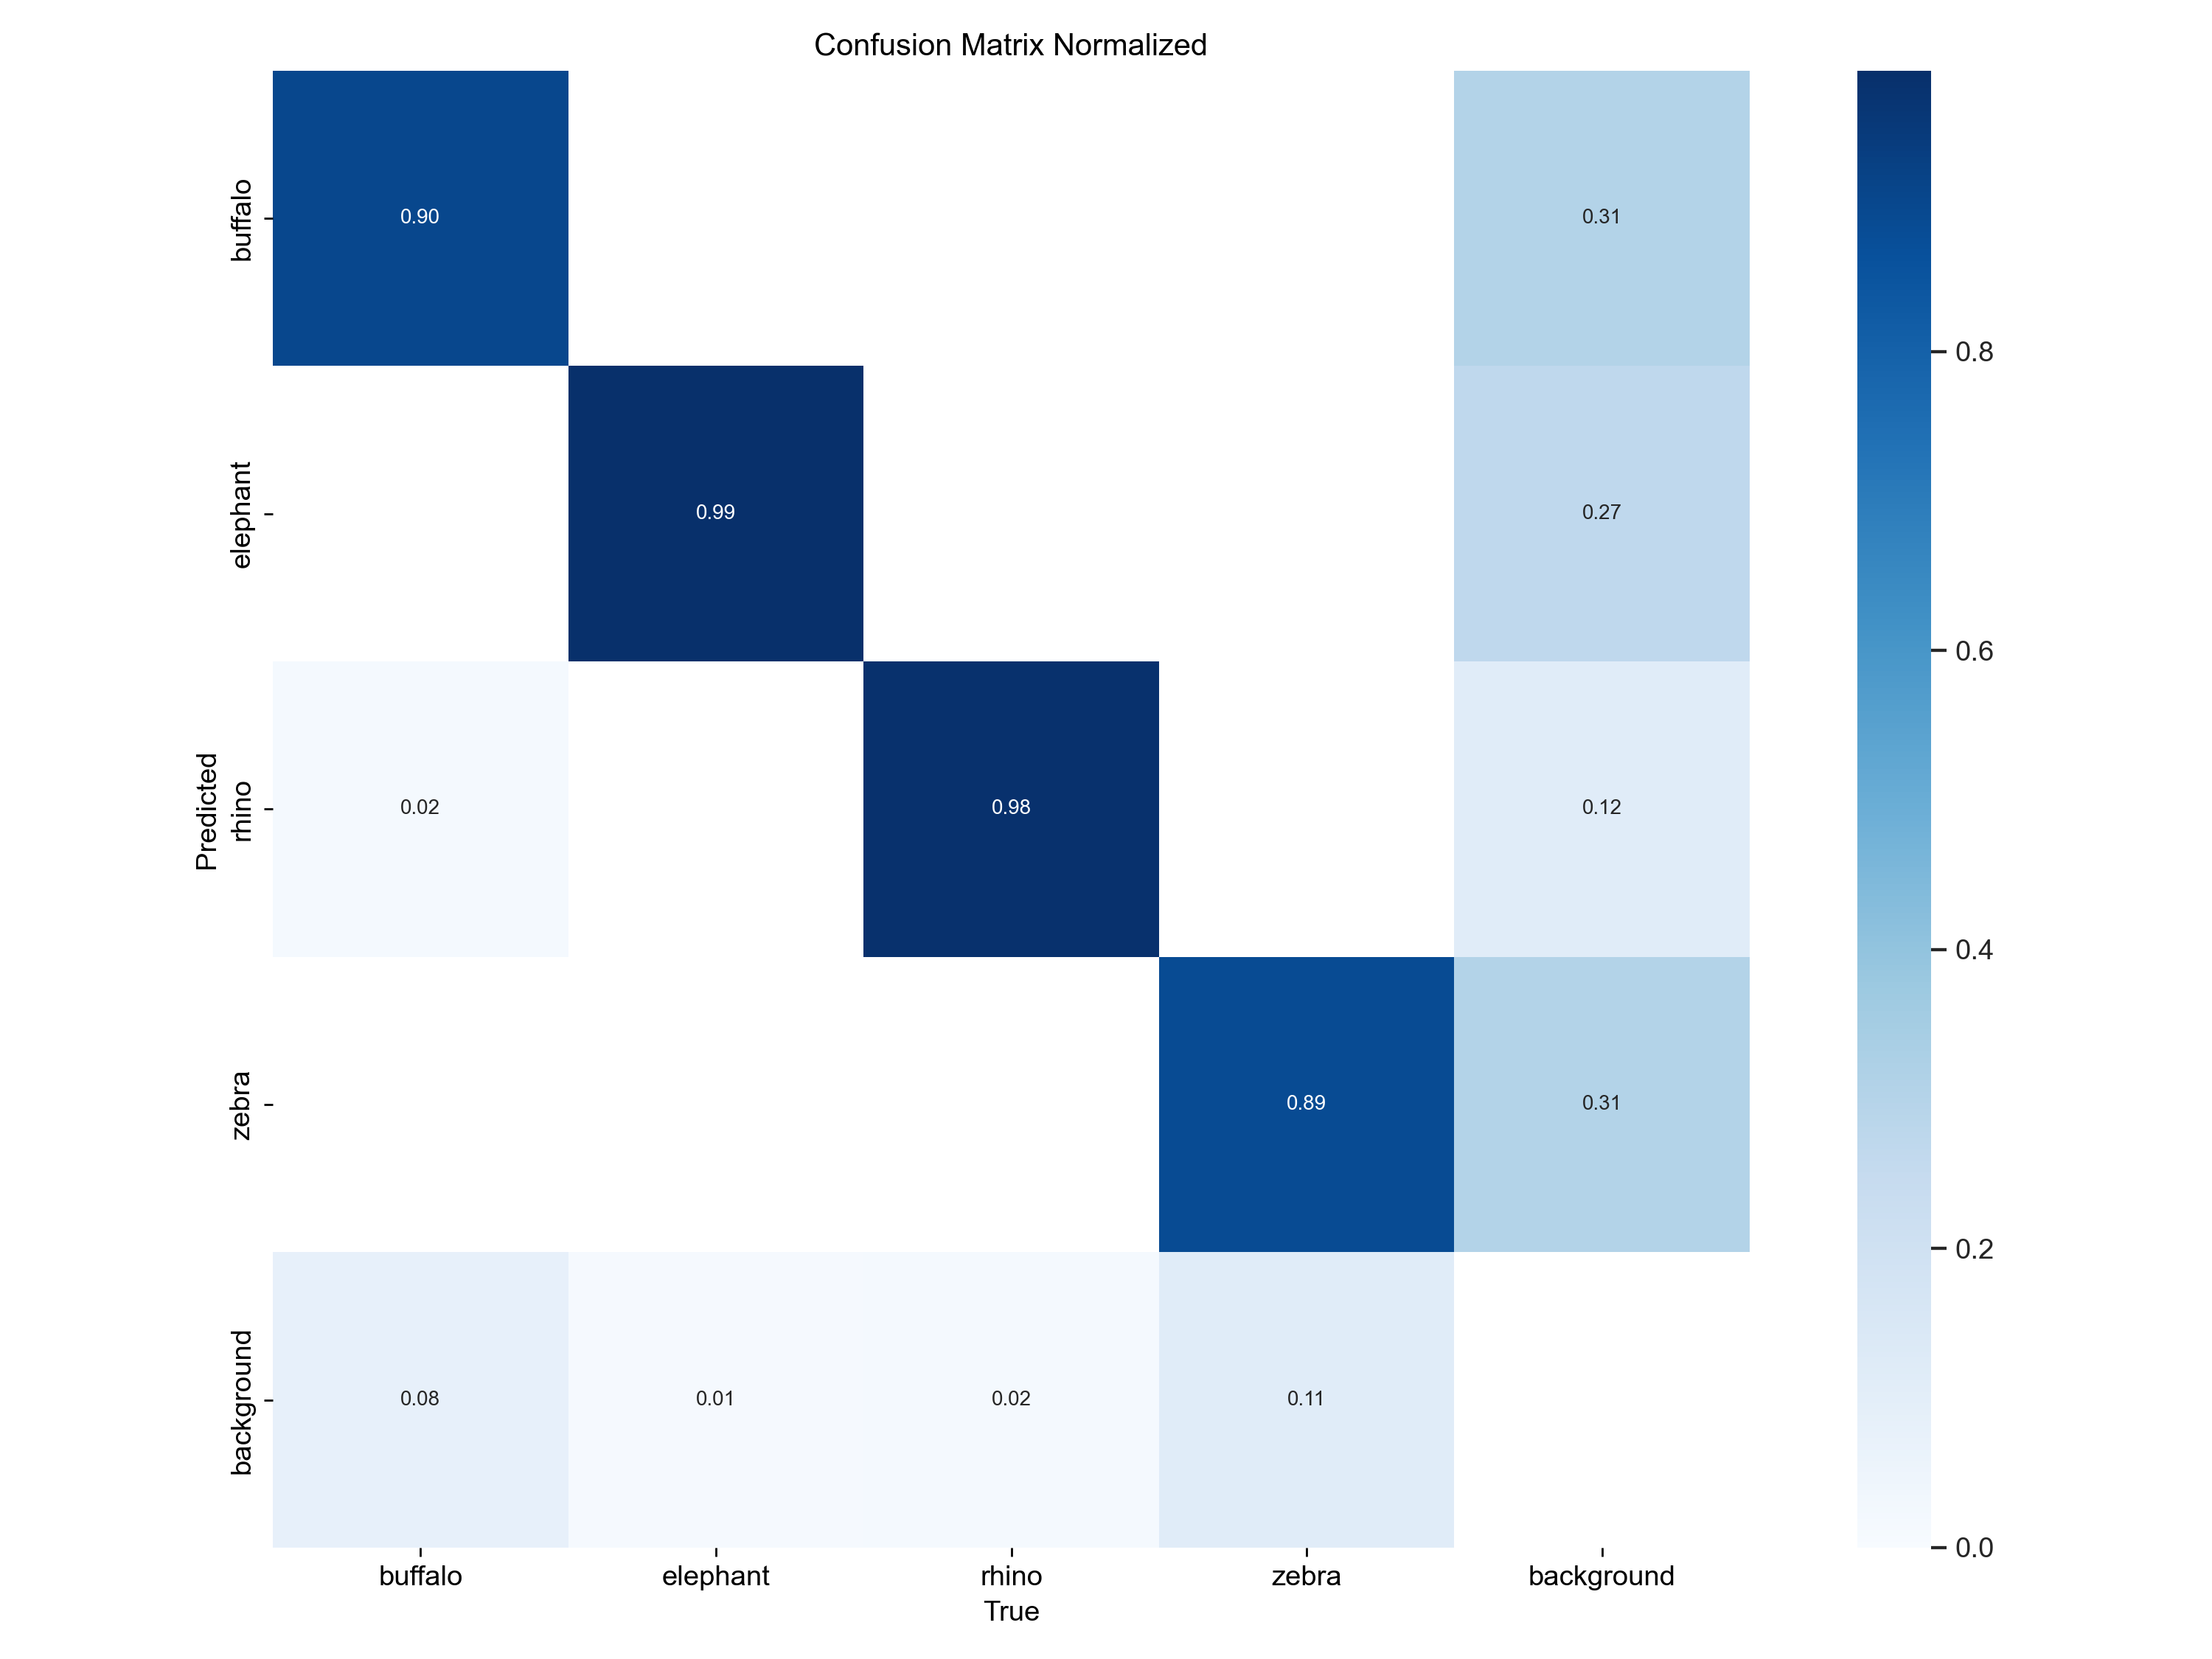

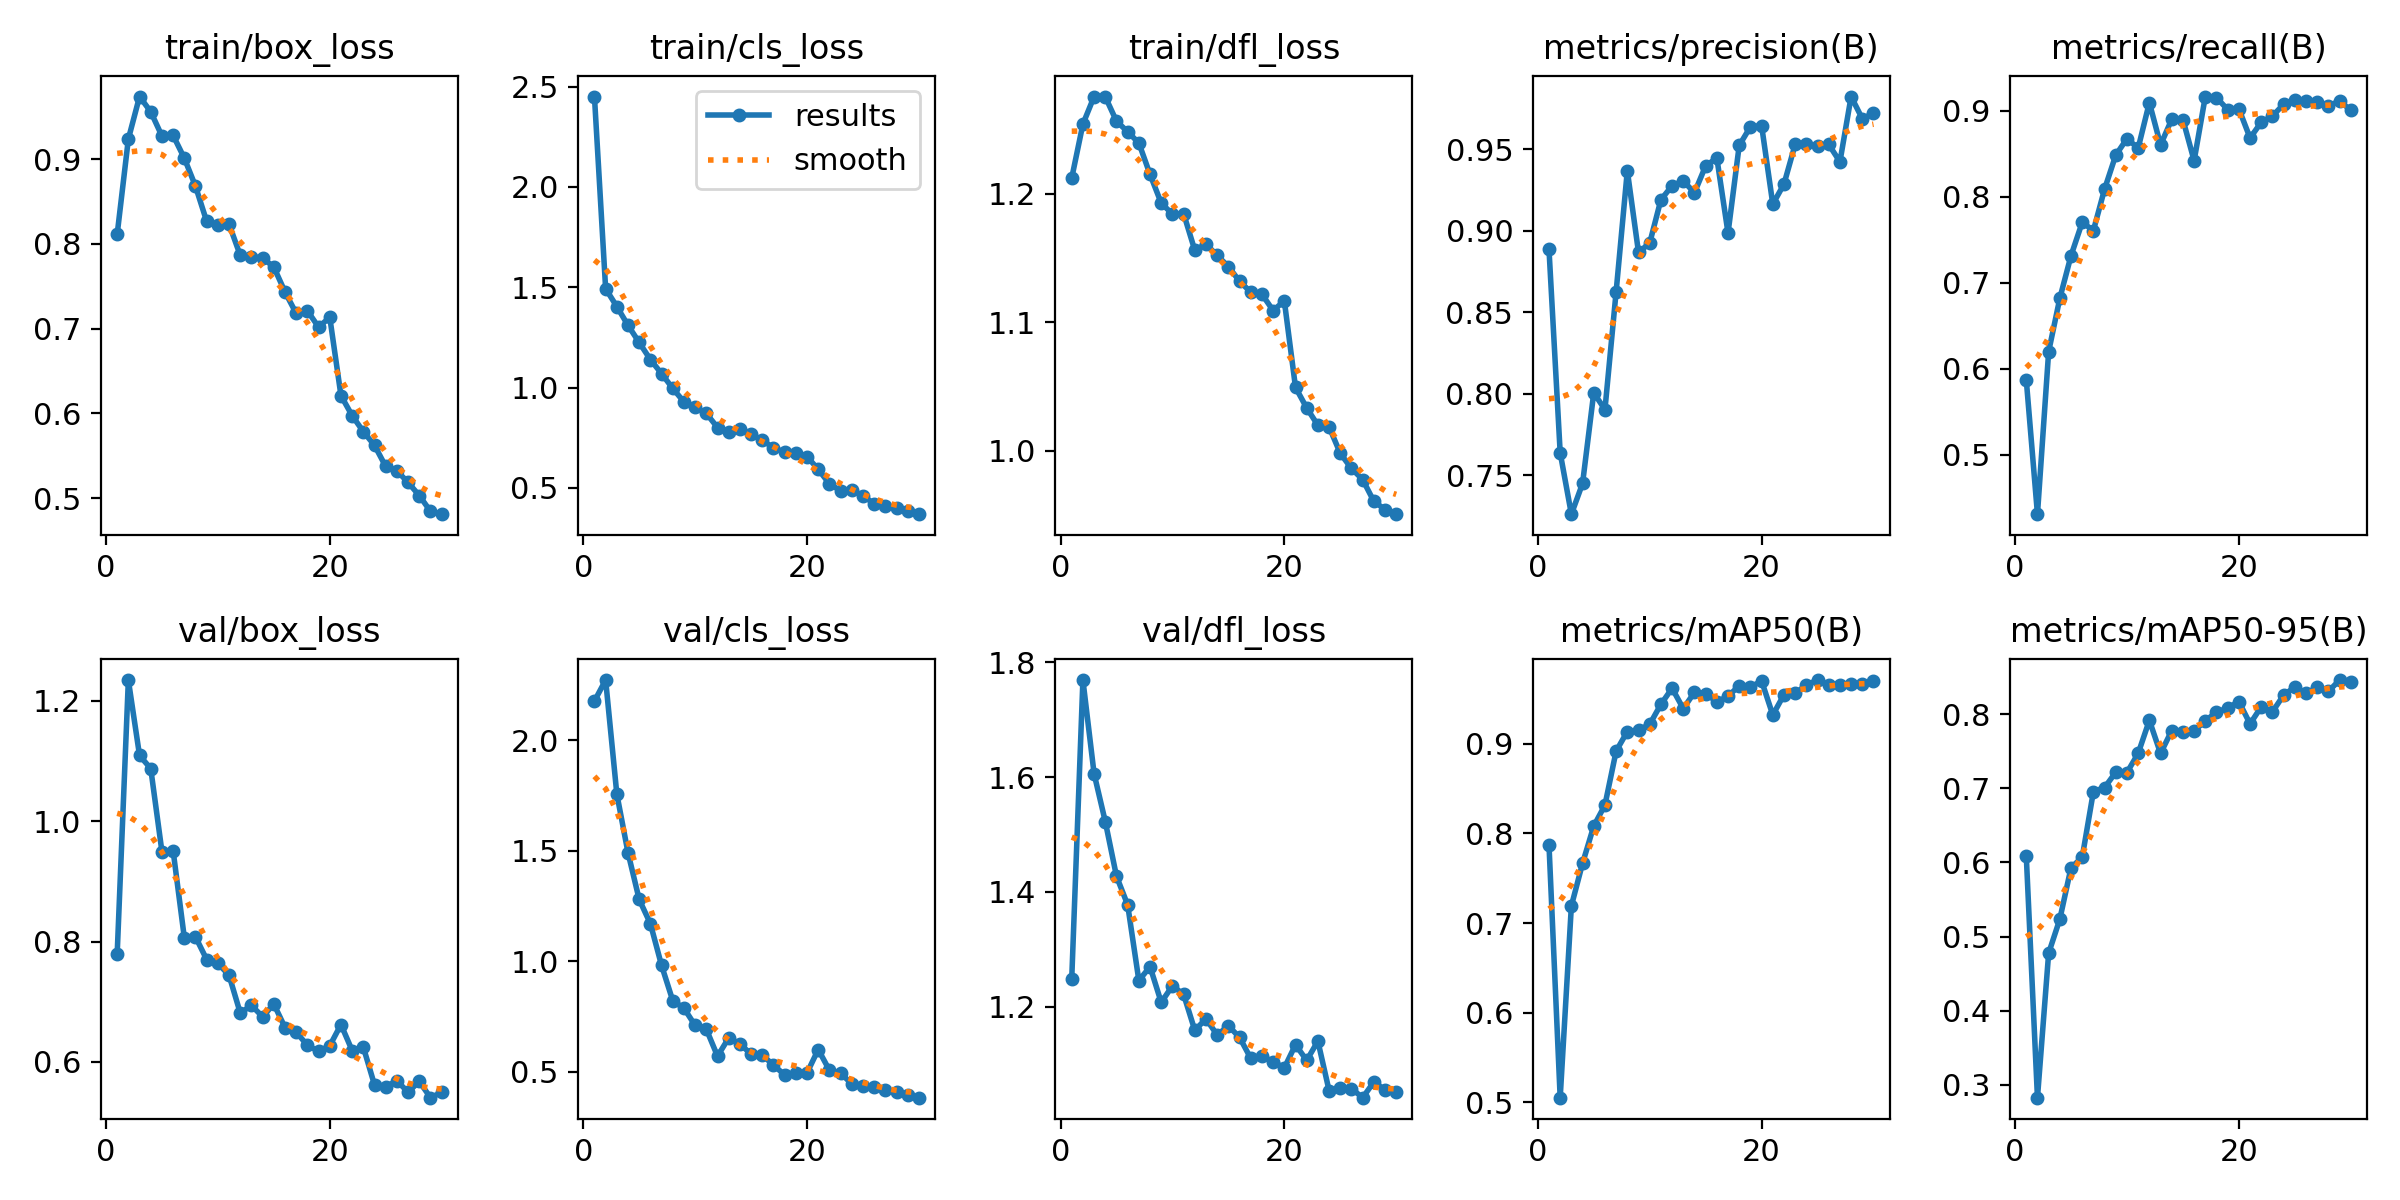

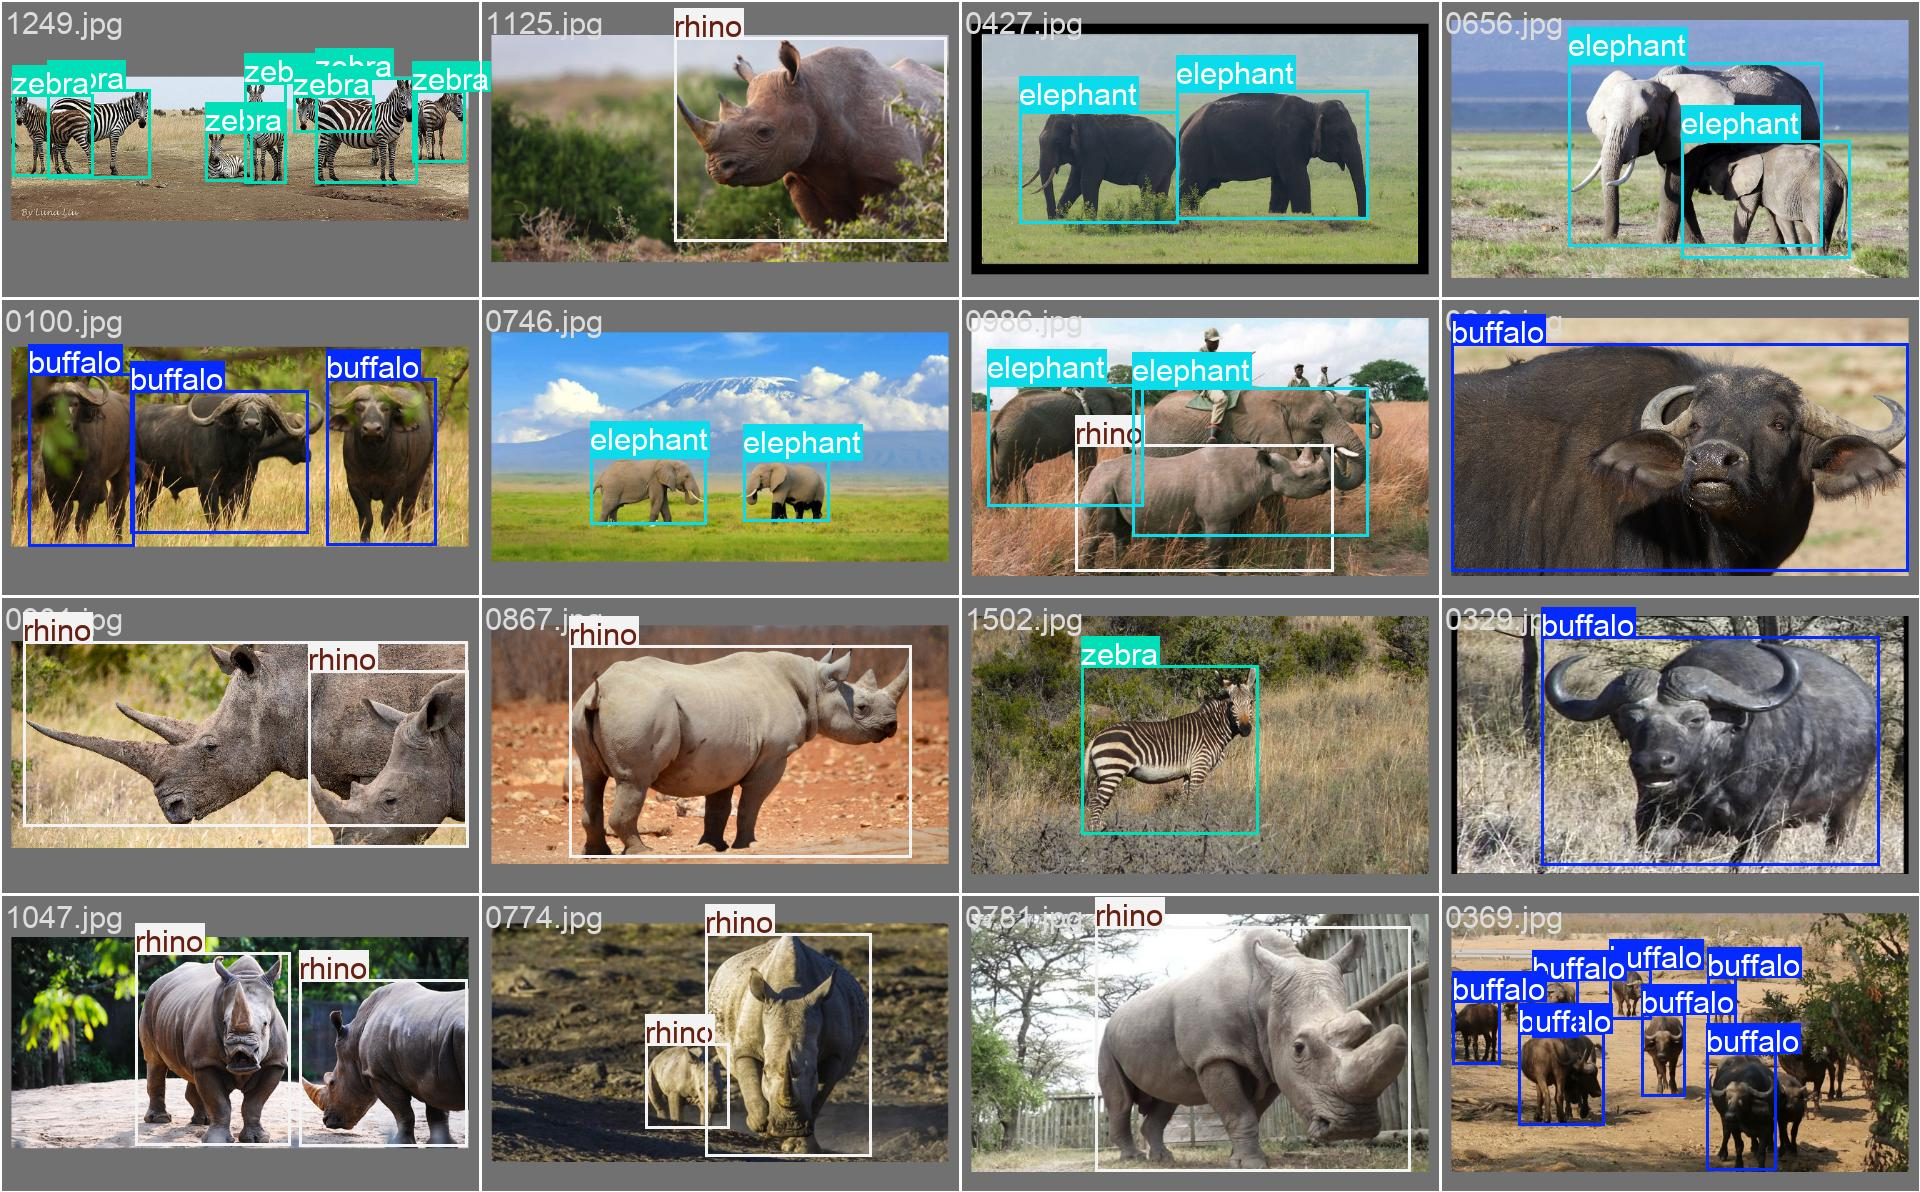

## 3. Улучшение бейзлайна

### Гипотезы

- Сильнее аугментировать изображения (Mosaic, Copy‑Paste, HSV) - это даст больше синтетики, лучше обобщение;
- Будем крутить/масштабировать изображения;
- Сменим оптимизатор на AdamW.

Создадим новый экземпляр модели

In [7]:
yolo_impr = YOLO('yolo11n.pt')

Обучим бейзлайн yolo с использованием предложенных гипотез улучшения:

In [9]:
yolo_impr.train(
    data='data.yaml',
    epochs=30,
    imgsz=640,
    batch=16,
    name='wildlife_yolo_impr',
    mosaic=1.0,
    copy_paste=0.1,
    hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,
    degrees=5, translate=0.1, scale=0.5, shear=2,
    optimizer='AdamW',
    lr0=1e-3,
    lrf=0.01,
    patience=15,
    warmup_epochs=3,
)

Ultralytics 8.3.111  Python-3.13.2 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=30, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=wildlife_yolo_impr, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

train: Scanning D:\Code\AI_labs_2\data8\final_data\train\labels.cache... 1203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1203/1203 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access  (ping: 0.00.0 ms, read: 1188.0478.5 MB/s, size: 135.6 KB)


val: Scanning D:\Code\AI_labs_2\data8\final_data\valid\labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]


Plotting labels to runs\detect\wildlife_yolo_impr\labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\wildlife_yolo_impr
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.31G      1.057      2.039      1.344         12        640: 100%|██████████| 76/76 [00:15<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]

                   all        150        262      0.855      0.119      0.451      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.43G      1.045      1.266      1.313         20        640: 100%|██████████| 76/76 [00:14<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        150        262      0.681      0.534       0.72      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.45G      1.041      1.158      1.308         13        640: 100%|██████████| 76/76 [00:14<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.10it/s]

                   all        150        262      0.789      0.725      0.834       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.45G      1.046      1.106      1.318          5        640: 100%|██████████| 76/76 [00:13<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.18it/s]

                   all        150        262      0.762      0.805      0.861       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.45G      1.015      1.068      1.308         10        640: 100%|██████████| 76/76 [00:14<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.10it/s]

                   all        150        262      0.821      0.756      0.863      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.45G     0.9922     0.9933      1.285          9        640: 100%|██████████| 76/76 [00:13<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.17it/s]

                   all        150        262      0.913      0.823      0.914      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.45G      1.006     0.9658      1.293         21        640: 100%|██████████| 76/76 [00:13<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        150        262      0.735      0.682      0.753      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.45G     0.9779     0.9455      1.275         17        640: 100%|██████████| 76/76 [00:14<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.05it/s]

                   all        150        262      0.937      0.813      0.914      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.45G     0.9542     0.8958      1.256         27        640: 100%|██████████| 76/76 [00:14<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.05it/s]

                   all        150        262      0.884      0.882      0.934      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.45G     0.9362     0.8611      1.247         16        640: 100%|██████████| 76/76 [00:14<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        150        262      0.893      0.823      0.921      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.45G     0.9384     0.8489      1.246         12        640: 100%|██████████| 76/76 [00:13<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.19it/s]

                   all        150        262       0.94      0.862      0.927      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.45G     0.9116     0.7949      1.216         12        640: 100%|██████████| 76/76 [00:14<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]

                   all        150        262       0.95      0.909      0.961      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.45G     0.9055     0.7824      1.223         12        640: 100%|██████████| 76/76 [00:14<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]

                   all        150        262       0.92      0.909      0.958      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.45G     0.9018     0.7765      1.208         18        640: 100%|██████████| 76/76 [00:14<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all        150        262      0.937      0.857      0.945      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.45G     0.8804     0.7627      1.205         13        640: 100%|██████████| 76/76 [00:14<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.12it/s]

                   all        150        262      0.933      0.869      0.938      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.45G     0.8596     0.7457      1.192         15        640: 100%|██████████| 76/76 [00:14<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.15it/s]

                   all        150        262      0.905      0.881      0.941      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.45G     0.8515     0.7075      1.194          7        640: 100%|██████████| 76/76 [00:14<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.20it/s]

                   all        150        262      0.931      0.921      0.962       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.45G     0.8306     0.7011      1.183         12        640: 100%|██████████| 76/76 [00:13<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.21it/s]

                   all        150        262      0.951      0.898      0.956      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.45G      0.819      0.696      1.168          8        640: 100%|██████████| 76/76 [00:13<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.17it/s]

                   all        150        262      0.941      0.892      0.954      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.45G     0.8333     0.6758      1.182         10        640: 100%|██████████| 76/76 [00:14<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.20it/s]

                   all        150        262       0.94      0.888      0.947      0.714


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.45G     0.7085     0.5519      1.107          4        640: 100%|██████████| 76/76 [00:14<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.06it/s]

                   all        150        262       0.92      0.881      0.945      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.45G      0.699     0.5183      1.089          5        640: 100%|██████████| 76/76 [00:13<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.12it/s]

                   all        150        262      0.926       0.93       0.96      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.45G     0.6951     0.4802       1.09          5        640: 100%|██████████| 76/76 [00:13<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.23it/s]

                   all        150        262      0.927      0.893      0.953      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.45G     0.6882     0.4981      1.096          7        640: 100%|██████████| 76/76 [00:13<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.17it/s]

                   all        150        262      0.929      0.912      0.959      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.45G     0.6573     0.4623      1.071          3        640: 100%|██████████| 76/76 [00:13<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.18it/s]

                   all        150        262      0.952      0.927      0.973      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.45G     0.6445     0.4395      1.057          7        640: 100%|██████████| 76/76 [00:13<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.16it/s]

                   all        150        262      0.943      0.928       0.97       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.46G     0.6283     0.4226      1.055          4        640: 100%|██████████| 76/76 [00:13<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.05it/s]

                   all        150        262      0.944      0.931      0.965       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.46G     0.6149     0.4105      1.026          6        640: 100%|██████████| 76/76 [00:13<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.29it/s]

                   all        150        262      0.947       0.93      0.963      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.46G     0.6022     0.4077      1.026          4        640: 100%|██████████| 76/76 [00:13<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]

                   all        150        262      0.951      0.933      0.963      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.46G     0.5941     0.3838      1.011          5        640: 100%|██████████| 76/76 [00:13<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.17it/s]

                   all        150        262      0.939      0.934      0.966      0.809



30 epochs completed in 0.136 hours.
Optimizer stripped from runs\detect\wildlife_yolo_impr\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\wildlife_yolo_impr\weights\best.pt, 5.5MB

Validating runs\detect\wildlife_yolo_impr\weights\best.pt...
Ultralytics 8.3.111  Python-3.13.2 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.98it/s]


                   all        150        262      0.939      0.934      0.966      0.809
               buffalo         38         60      0.911      0.917      0.935      0.815
              elephant         43         83      0.907      0.937      0.972      0.778
                 rhino         42         58      0.986      0.966      0.994      0.888
                 zebra         28         61      0.955      0.918      0.964      0.756
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\wildlife_yolo_impr


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000022AAB201160>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

По итогам обучения получаем:

mAP50 = 0.966 \
mAP50-95 = 0.809

Улучшения бейзлайна не наблюдаются, посмотрим на confusion matrix. Модель стала чаще путать классы фона и слона, однако по основным классам точность увеличилась

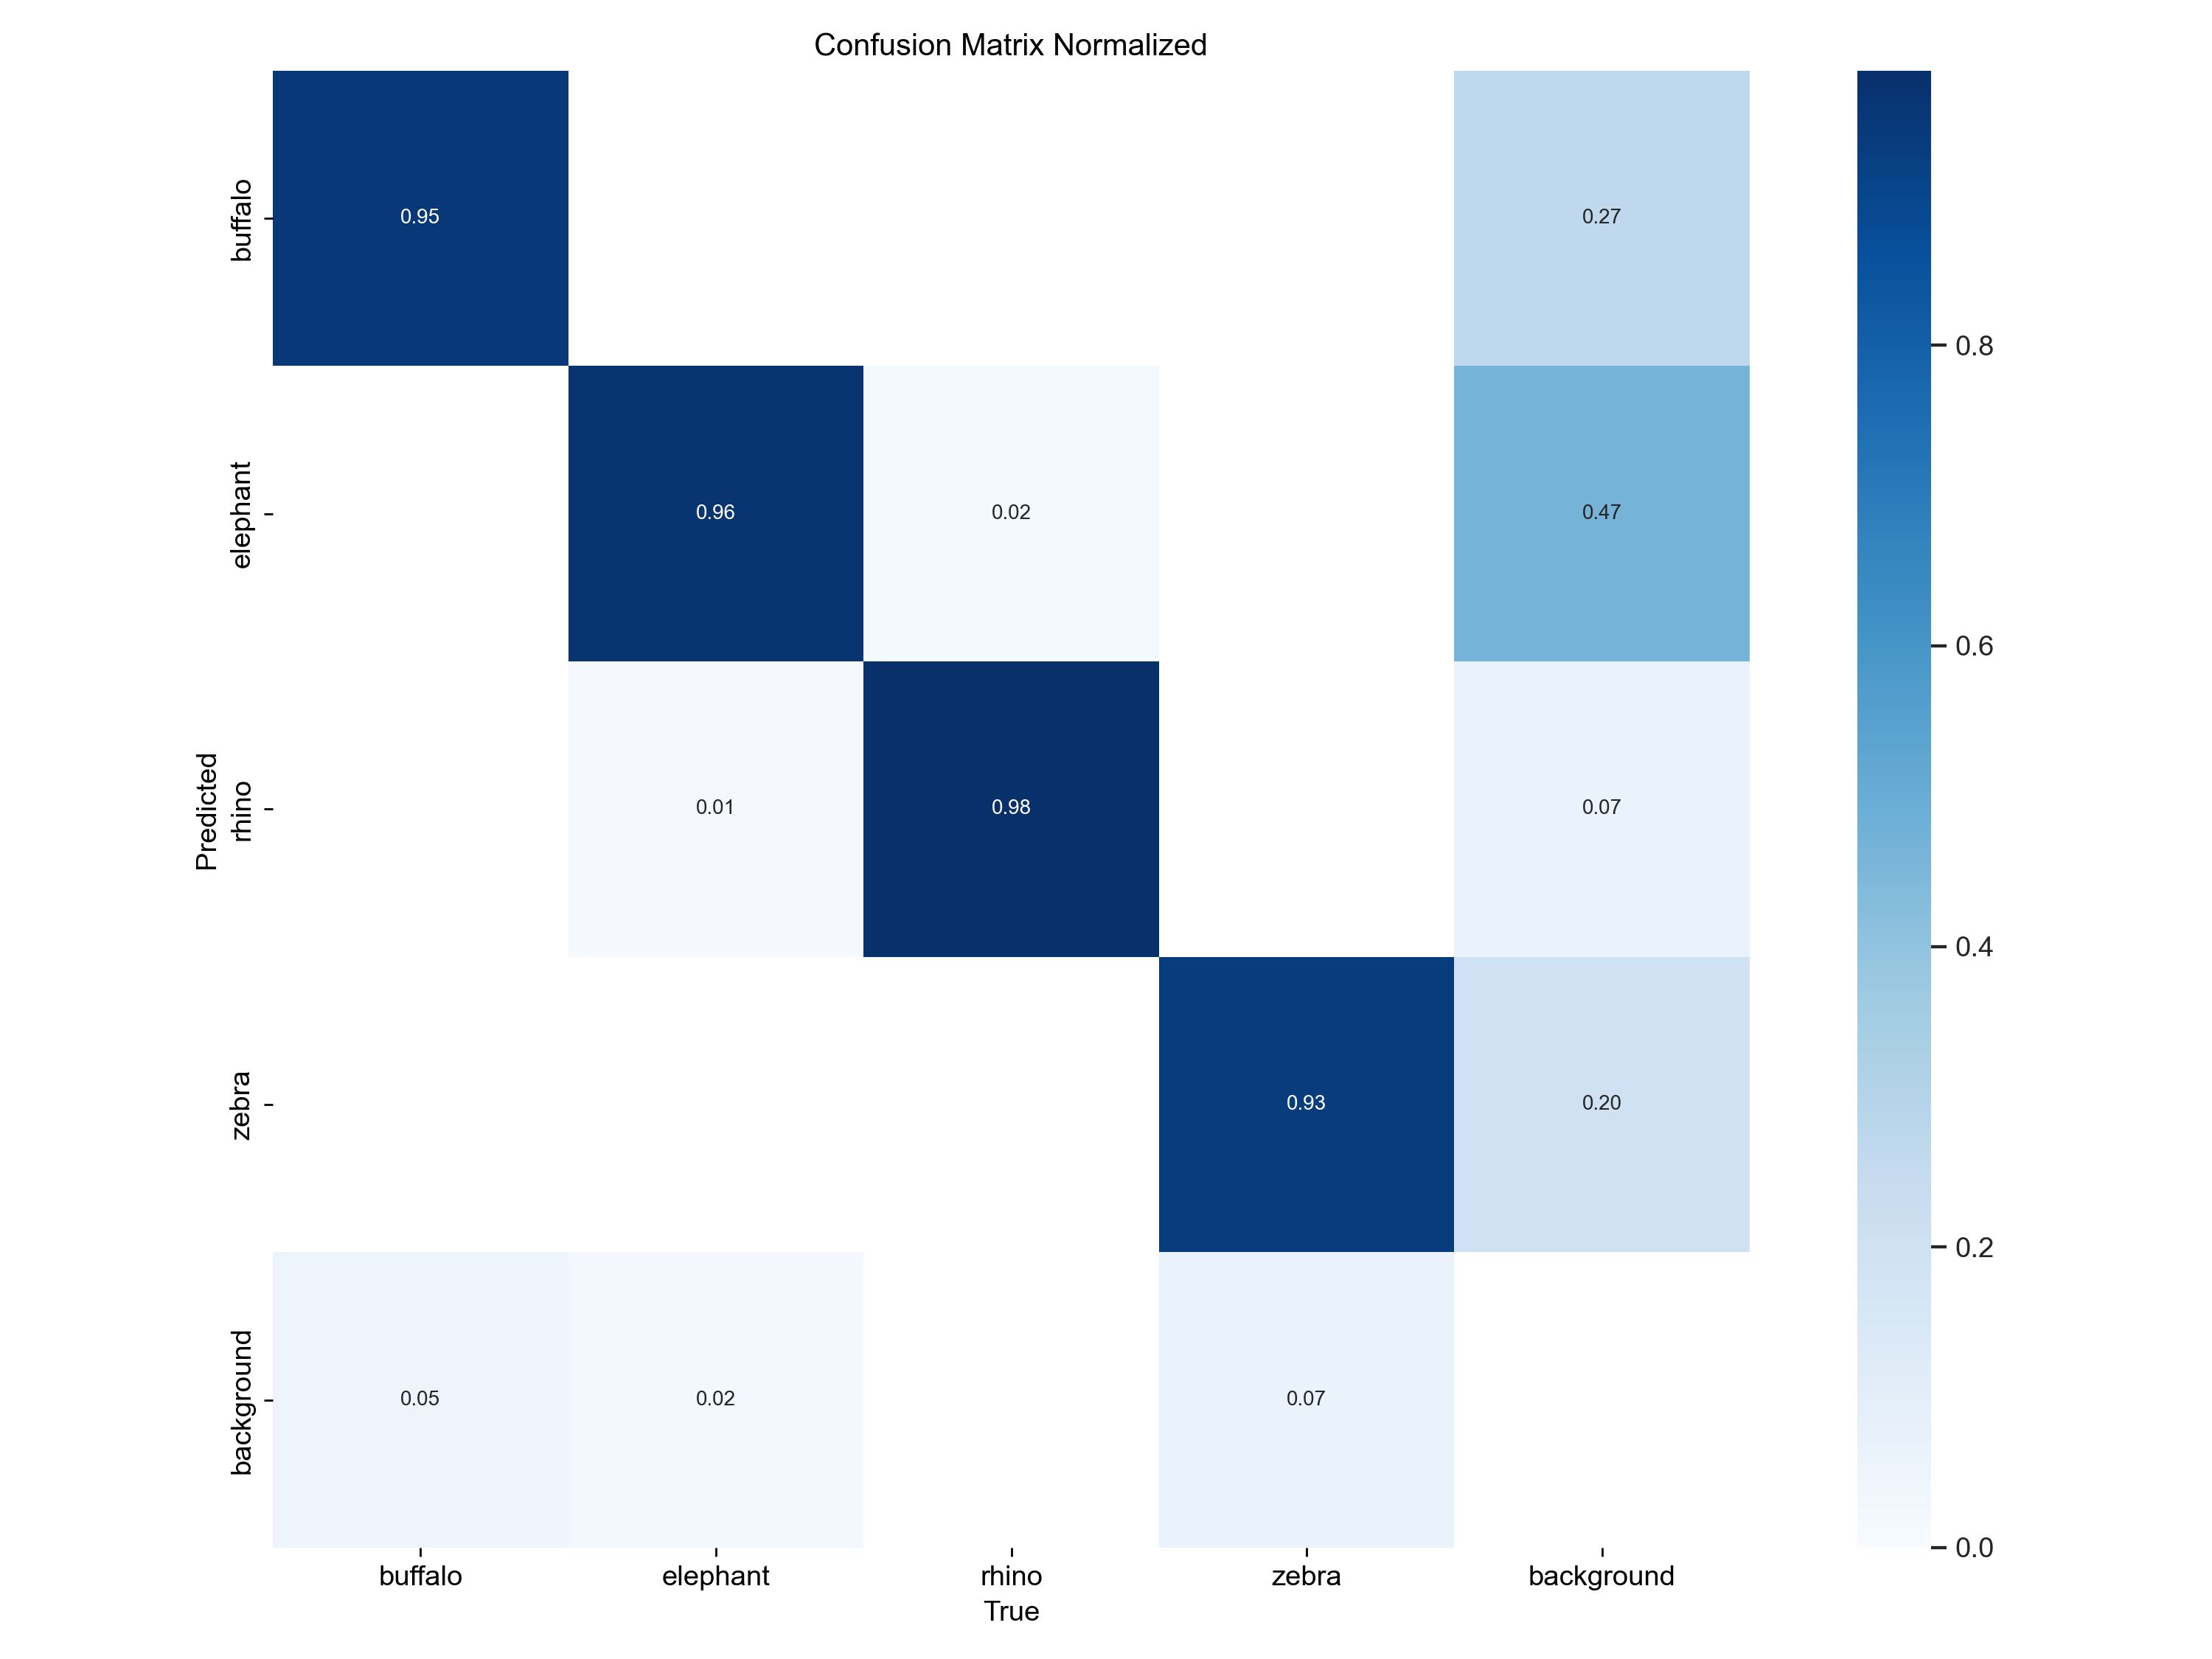

## 4. Имплементация алгоритма машинного обучения


На данном шаге самостоятельно имплементируем простую YOLO

In [1]:
import os
import yaml
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torchvision.transforms as T
from torchmetrics.detection.mean_ap import MeanAveragePrecision

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cuda


Настроим загрузку данных из data.yaml

In [ ]:
with open('data.yaml') as f:
    data_config = yaml.safe_load(f)

train_img_dir = data_config.get('train', '')
val_img_dir = data_config.get('val', '')

train_label_dir = data_config.get('train_labels', train_img_dir.replace('images', 'labels'))
val_label_dir = data_config.get('val_labels',   val_img_dir.replace('images', 'labels'))

class_names = data_config.get('names', [])
num_classes = len(class_names)

print("found classes:", num_classes)


found classes: 4


Определим YoloDataset - интерфейс для работы с датасетом

In [ ]:
class YoloDataset(Dataset):
    def __init__(self, img_dir, label_dir, img_size=224, S=7, B=1, C=20, transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.img_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('jpg','jpeg','png'))]
        self.img_size = img_size
        self.S = S
        self.B =B
        self.C=C
        self.transform = transform if transform else T.Compose([
            T.Resize((img_size, img_size)),
            T.ToTensor(),
        ])

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_files[idx])
        label_path = os.path.join(self.label_dir, os.path.splitext(self.img_files[idx])[0] + '.txt')
        img = Image.open(img_path).convert('RGB')
        img = self.transform(img)

        target = torch.zeros((self.S, self.S, 5*self.B + self.C))
        boxes = []
        labels = []

        if os.path.exists(label_path):
            for line in open(label_path, 'r').read().splitlines():
                cls, x_ctr, y_ctr, w, h = map(float, line.split())
                cls = int(cls)
                
                i = int(x_ctr * self.S)
                j = int(y_ctr * self.S)
                x_cell = x_ctr * self.S - i
                y_cell = y_ctr * self.S - j

                if target[j, i, 4] == 0:
                    target[j, i, 0] = x_cell
                    target[j, i, 1] = y_cell
                    target[j, i, 2] = w
                    target[j, i, 3] = h
                    target[j, i, 4] = 1
                    target[j, i, 5 + cls] = 1

                x_abs = x_ctr * self.img_size
                y_abs = y_ctr * self.img_size
                w_abs = w * self.img_size
                h_abs = h * self.img_size
                x1 = x_abs - w_abs/2
                y1 = y_abs - h_abs/2
                x2 = x_abs + w_abs/2
                y2 = y_abs + h_abs/2
                boxes.append([x1, y1, x2, y2])
                labels.append(cls)

        boxes  = torch.tensor(boxes, dtype=torch.float32) if boxes  else torch.zeros((0,4), dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64) if labels else torch.zeros((0,), dtype=torch.int64)
        return img, target, boxes, labels


Определим коллатор и даталоадеры

In [ ]:
def collate_fn(batch):
    imgs = torch.stack([item[0] for item in batch], dim=0)
    yolo_targets = torch.stack([item[1] for item in batch], dim=0)
    boxes_list = [item[2] for item in batch]
    labels_list = [item[3] for item in batch]
    return imgs, yolo_targets, boxes_list, labels_list

img_size = 224
S = 7
B = 1
C = num_classes
batch_size = 16

train_dataset = YoloDataset(train_img_dir, train_label_dir, img_size, S, B, C)
val_dataset = YoloDataset(val_img_dir, val_label_dir,  img_size, S, B, C)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  num_workers=0, pin_memory=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True, collate_fn=collate_fn)


Определим саму кастомную Yolo:

In [ ]:
class MyYolo(nn.Module):
    def __init__(self, S=7, B=1, C=20):
        super().__init__()
        self.S = S
        self.B = B
        self.C = C

        self.backbon = nn.Sequential(
            nn.Conv2d(3,16, 3, 1, 1), nn.BatchNorm2d(16), nn.LeakyReLU(0.1), nn.MaxPool2d(2,2),
            nn.Conv2d(16, 32, 3, 1, 1), nn.BatchNorm2d(32), nn.LeakyReLU(0.1), nn.MaxPool2d(2,2),
            nn.Conv2d(32, 64, 3, 1, 1), nn.BatchNorm2d(64), nn.LeakyReLU(0.1), nn.MaxPool2d(2,2),
            nn.Conv2d(64, 128, 3, 1, 1), nn.BatchNorm2d(128), nn.LeakyReLU(0.1), nn.MaxPool2d(2,2),
            nn.Conv2d(128, 256,3, 1, 1), nn.BatchNorm2d(256), nn.LeakyReLU(0.1), nn.MaxPool2d(2,2),
            )
        self.pred = nn.Conv2d(256, self.B*5 + self.C, 1)

    def forward(self, x):
        x =self.backbon(x)
        x =self.pred(x)
        x =x.permute(0, 2, 3, 1)
        return x

model = MyYolo(S=S, B=B, C=C).to(device)



In [6]:
print(model)

MyYolo(
  (backbon): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.1)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.1)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(128, e

Определим loss для кастомной yolo:

In [ ]:
class YoloLoss(nn.Module):
    def __init__(self, S=7, B=1, C=20, lambda_coord=5, lambda_noobj=0.5):
        super().__init__()
        self.S = S
        self.B = B
        self.C = C
        self.lambda_coord = lambda_coord
        self.lambda_noobj = lambda_noobj
        self.mse = nn.MSELoss(reduction='sum')
        self.bce = nn.BCEWithLogitsLoss(reduction='none')
        self.ce = nn.CrossEntropyLoss(reduction='none')

    def forward(self, preds, target):
        obj_mask = target[..., 4]
        noobj_mask = 1-obj_mask

        pred_box = torch.sigmoid(preds[..., :4])
        pred_obj = preds[..., 4]
        pred_cls = preds[..., 5:]
        tgt_box = target[..., :4]
        tgt_obj = target[..., 4]
        tgt_cls_oh = target[..., 5:]

        coord_loss = self.mse(obj_mask.unsqueeze(-1) * pred_box,obj_mask.unsqueeze(-1)*tgt_box)
        ####
        obj_loss = torch.sum(obj_mask* self.bce(pred_obj, tgt_obj))
        noobj_loss = torch.sum(noobj_mask *self.bce(pred_obj, tgt_obj))

        pred_cls_flat = pred_cls.reshape(-1, self.C)
        tgt_cls_ids = torch.argmax(tgt_cls_oh, dim=-1).reshape(-1)
        cls_loss_all = self.ce(pred_cls_flat, tgt_cls_ids)
        cls_loss = torch.sum(obj_mask.reshape(-1) * cls_loss_all)

        total_loss = (self.lambda_coord * coord_loss + obj_loss + self.lambda_noobj * noobj_loss + cls_loss)
        return total_loss

loss_fn = YoloLoss(S=S, B=B, C=C).to(device)



Работа с метриками - mAP50 и mAP50-95

In [ ]:
from tqdm import tqdm
map50_metric = MeanAveragePrecision(iou_thresholds=[0.5])
map50_95_metric = MeanAveragePrecision()

def train_epoch(loader, model, optimizer, loss_fn, device):
    model.train()
    total_loss = 0
    ##############
    for imgs, y_targets, _, _ in loader:
        imgs = imgs.to(device)
        y_targets = y_targets.to(device)
        preds = model(imgs)
        loss = loss_fn(preds, y_targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print("loss: ", total_loss / len(loader))
##############
def eval(loader, model, device, conf_thresh=0.5):
    model.eval()
    map50_metric.reset()
    map50_95_metric.reset()
    with torch.no_grad():
        for imgs, _, boxes_l, labels_l in loader:
            imgs = imgs.to(device)
            preds = model(imgs).cpu()

            for b in range(imgs.size(0)):
                det_boxes = []
                det_scores = []
                det_labels = []
                for i in range(S):
                    for j in range(S):
                        conf = torch.sigmoid(preds[b,i,j,4])
                        if conf < conf_thresh: #todo
                            continue
                        x_cell, y_cell, w_cell, h_cell = torch.sigmoid(preds[b, i, j, :4])
                        x_center = (j + x_cell)/S
                        y_center = (i + y_cell)/S
                        w = w_cell
                        h = h_cell

                        x1 = (x_center-w/2) * img_size
                        y1 =(y_center-h/2) * img_size
                        x2 = (x_center + w/2) * img_size
                        y2 = (y_center + h/2) * img_size
                        det_boxes.append([x1, y1, x2, y2])

                        cls_probs = torch.softmax(preds[b, i, j, 5:], dim=-1)
                        cls_score, cls_idx = torch.max(cls_probs, dim=-1)
                        det_scores.append((conf * cls_score).item())
                        det_labels.append(cls_idx.item())

                if len(det_boxes) > 0:
                    batch_pred = {
                        'boxes': torch.tensor(det_boxes,dtype=torch.float32),
                        'scores': torch.tensor(det_scores,dtype=torch.float32),
                        'labels': torch.tensor(det_labels,dtype=torch.int64)
                    }
                else:
                    batch_pred = {
                        'boxes': torch.zeros((0,4), dtype=torch.float32),
                        'scores': torch.zeros((0,), dtype=torch.float32),
                        'labels': torch.zeros((0,),dtype=torch.int64)
                    }

                gt = {
                    'boxes': boxes_l[b].to(torch.float32),
                    'labels': labels_l[b]
                }
                map50_metric.update([batch_pred], [gt])
                map50_95_metric.update([batch_pred], [gt])

    res50 = map50_metric.compute()
    res50_95 = map50_95_metric.compute()
    print("val mAP50:", res50['map_50'])
    print("val mAP50-95:",res50_95['map'])


Запустим обучение на 30 эпохах и посмотрим на результаты:

In [9]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)
epochs = 30

for epoch in range(1, epochs+1):
    print("epoch", epoch, "/", epochs)
    train_epoch(train_loader, model, optimizer,loss_fn, device)
    eval(val_loader, model, device)


epoch 1 / 30
loss:  191.6458585387782
val mAP50: tensor(0.0227)
val mAP50-95: tensor(0.0059)
epoch 2 / 30
loss:  131.89553702505012
val mAP50: tensor(0.0367)
val mAP50-95: tensor(0.0060)
epoch 3 / 30
loss:  117.16538486982647
val mAP50: tensor(0.0260)
val mAP50-95: tensor(0.0071)
epoch 4 / 30
loss:  108.71507117622777
val mAP50: tensor(0.0918)
val mAP50-95: tensor(0.0248)
epoch 5 / 30
loss:  100.70254215441253
val mAP50: tensor(0.1496)
val mAP50-95: tensor(0.0395)
epoch 6 / 30
loss:  94.42050527271472
val mAP50: tensor(0.0101)
val mAP50-95: tensor(0.0039)
epoch 7 / 30
loss:  89.2375098027681
val mAP50: tensor(0.0974)
val mAP50-95: tensor(0.0295)
epoch 8 / 30
loss:  82.2869464347237
val mAP50: tensor(0.0499)
val mAP50-95: tensor(0.0149)
epoch 9 / 30
loss:  77.6005260818883
val mAP50: tensor(0.0754)
val mAP50-95: tensor(0.0235)
epoch 10 / 30
loss:  73.15219939382453
val mAP50: tensor(0.1097)
val mAP50-95: tensor(0.0316)
epoch 11 / 30
loss:  67.52166601231224
val mAP50: tensor(0.1205)
val

В ходе обучения удалось достигнуть точности (в лучшем случае) 0.2 по mAP50 и 0.08 по mAP50-95. Можно сделать вывод, что модели нужно больше эпох для достижения более хороших результатов

Применим гипотезы улучшения бейзлайна, которые применяли ранее. Так же увеличим число эпох до 50

In [ ]:
import random
import numpy as np
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2

class YoloDataset(Dataset):
    def __init__(self,img_dir, lbl_dir,img_size=224, S=7, B=1, C=20, mosaic=1.0, copy_paste=0.1, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=5, translate=0.1, scale=0.5, shear=2):
        self.img_dir = img_dir
        self.lbl_dir = lbl_dir
        self.files = [f for f in os.listdir(img_dir) if f.lower().endswith(('jpg','png','jpeg'))]
        self.img_size, self.S, self.B, self.C = img_size, S, B, C
        self.mosaic_prob = mosaic
        self.copy_paste_prob = copy_paste

        self.hsv_affine = A.Compose([
            A.HueSaturationValue(
                hue_shift_limit=int(hsv_h * 180),
                sat_shift_limit=int(hsv_s * 255),
                val_shift_limit=int(hsv_v * 255),
                p=1.0
            ),
            A.Affine(
                rotate=degrees,
                translate_percent={'x': translate, 'y': translate},
                scale=(1-scale, 1+scale),
                shear=shear,
                p=1.0
            ),
            A.Resize(img_size, img_size),
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='yolo',label_fields=['class_labels'])
            )

    def __len__(self):
        return len(self.files)

    def _load_image(self, idx):
        img_path = os.path.join(self.img_dir, self.files[idx])
        lbl_path = os.path.join(self.lbl_dir, os.path.splitext(self.files[idx])[0] + '.txt')
        img = Image.open(img_path).convert('RGB').resize((self.img_size, self.img_size))
        bboxes, classes = [], []
        if os.path.exists(lbl_path):
            for line in open(lbl_path):
                cls, x, y, w, h = map(float, line.split())
                bboxes.append([x, y, w, h])
                classes.append(int(cls))
        return img, bboxes, classes

    def _make_mosaic(self, idx):
        indices = [idx]+random.sample(range(len(self.files)), 3)
        msize = self.img_size // 2
        mosaic_img = Image.new('RGB', (self.img_size, self.img_size))
        mb, mc = [], []
        for k, i in enumerate(indices):
            img, boxes, classes = self._load_image(i)
            img = img.resize((msize, msize))
            row, col = divmod(k, 2)
            x_off, y_off = col * msize, row * msize
            mosaic_img.paste(img, (x_off, y_off))
            for (x, y, w, h), c in zip(boxes, classes):
                mb.append([(col+x)/2, (row+y)/2, w/2, h/2])
                mc.append(c)

        return mosaic_img, mb, mc

    def _copy_paste(self, img, bboxes, classes):
        idx = random.randrange(len(self.files))
        img2, boxes2, cls2 = self._load_image(idx)
        if not boxes2:
            return img, bboxes, classes

        i = random.randrange(len(boxes2))
        x, y, w, h = boxes2[i]
        x1 = int((x - w/2)*self.img_size)
        y1 = int((y - h/2)*self.img_size)
        x2 = x1 + int(w * self.img_size)
        y2 = y1 + int(h * self.img_size)
        crop = img2.crop((x1, y1, x2, y2)).resize((x2-x1, y2-y1))
        img.paste(crop,(x1, y1))
        bboxes.append([x, y, w, h])
        classes.append(cls2[i])
        return img, bboxes, classes

    def __getitem__(self, idx):
        if random.random()< self.mosaic_prob:
            img, bboxes, classes = self._make_mosaic(idx)
        else:
            img, bboxes, classes = self._load_image(idx)
        if random.random()<self.copy_paste_prob:
            img, bboxes, classes = self._copy_paste(img, bboxes, classes)

        clean_b, clean_c = [], []
        for (x, y, w, h), c in zip(bboxes, classes):
            x1 = x - w/2; y1 = y - h/2
            x2 = x + w/2; y2 = y + h/2
            x1_cl = max(0.0, x1); y1_cl = max(0.0, y1)
            x2_cl = min(1.0, x2); y2_cl = min(1.0, y2)
            if x2_cl <= x1_cl or y2_cl <= y1_cl:
                continue
            w_cl = x2_cl - x1_cl; h_cl = y2_cl - y1_cl
            cx_cl = (x1_cl + x2_cl)/2; cy_cl = (y1_cl + y2_cl)/2
            clean_b.append([cx_cl, cy_cl, w_cl, h_cl])
            clean_c.append(int(c))
        bboxes, classes = clean_b, clean_c

        augmented = self.hsv_affine(
            image=np.array(img),
            bboxes=bboxes,
            class_labels=classes
        )
        img_t = augmented['image']
        bboxes = augmented['bboxes']
        classes = augmented['class_labels']

        target = torch.zeros((self.S, self.S, 5*self.B + self.C))
        gt_boxes, gt_labels =[],[]
        for (x, y, w, h), c in zip(bboxes, classes):
            i, j = int(x*self.S), int(y*self.S)
            xc = x*self.S -i
            yc = y*self.S -j
            if target[j,i,4] == 0:
                target[j,i,0:4] = torch.tensor([xc, yc, w, h])
                target[j,i,4]   = 1
                target[j,i,5+int(c)] = 1
            
            x_abs = x* self.img_size
            y_abs = y*self.img_size
            w_abs = w*self.img_size
            h_abs = h*self.img_size
            gt_boxes.append([x_abs- w_abs/2, y_abs - h_abs/2, x_abs+w_abs/2, y_abs + h_abs/2])
            gt_labels.append(int(c))

        if gt_boxes:
            gt_boxes = torch.tensor(gt_boxes, dtype=torch.float32)
            gt_labels = torch.tensor(gt_labels, dtype=torch.int64)
        else:
            gt_boxes = torch.zeros((0,4),dtype=torch.float32)
            gt_labels = torch.zeros((0,), dtype=torch.int64)

        if isinstance(img_t, np.ndarray):
            img_t = torch.from_numpy(img_t).permute(2,0,1).float() / 255.0
        elif img_t.dtype == torch.uint8:
            img_t = img_t.float() / 255.0

        return img_t, target, gt_boxes, gt_labels




d:\Code\AI_labs_2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Процесс во многом аналогичен созданию бейзлайна

In [11]:
with open('data.yaml') as f:
    data_config = yaml.safe_load(f)

train_img_dir = data_config['train']
val_img_dir = data_config['val']
train_lbl_dir = data_config.get('train_labels', train_img_dir.replace('images','labels'))
val_lbl_dir = data_config.get('val_labels',val_img_dir.replace('images','labels'))

class_names = data_config['names']
num_classes = len(class_names)
print("found classes:", num_classes)


found classes: 4


In [ ]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    imgs = torch.stack([b[0] for b in batch])
    y_targets = torch.stack([b[1] for b in batch])
    boxes_list = [b[2] for b in batch]
    labels_list= [b[3] for b in batch]
    return imgs, y_targets, boxes_list, labels_list

img_size = 224
S, B, C = 7,1, num_classes
batch_size = 16

train_ds = YoloDataset(train_img_dir, train_lbl_dir, img_size, S, B, C, mosaic=1.0, copy_paste=0.1, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=5, translate=0.1, scale=0.5, shear=2)
val_ds = YoloDataset(val_img_dir, val_lbl_dir,img_size, S, B, C, mosaic=0.0, copy_paste=0.0, hsv_h=0.0, hsv_s=0.0, hsv_v=0.0, degrees=0, translate=0, scale=0, shear=0)

train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=0, pin_memory=True, collate_fn=collate_fn)
val_loader = DataLoader(val_ds, batch_size, shuffle=False, num_workers=0, pin_memory=True, collate_fn=collate_fn)


Меняем оптимизатор, число эпох и lr

In [ ]:
map50 = MeanAveragePrecision(iou_thresholds=[0.5])
map50_95 = MeanAveragePrecision()

init_lr = 1e-4
optimizer = optim.AdamW(model.parameters(), lr=init_lr)
epochs = 50
lrf = 0.01
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs, eta_min=init_lr * lrf)


In [ ]:
for epoch in range(1, epochs+1):
    print("epoch", epoch, "/", epochs)
    train_epoch(train_loader, model, optimizer,loss_fn, device)
    eval(val_loader, model, device)
    scheduler.step()



epoch 1 / 50
loss:  429.62415855809263
val mAP50: tensor(0.0238)
val mAP50-95: tensor(0.0051)
epoch 2 / 50
loss:  356.37472478966964
val mAP50: tensor(0.0352)
val mAP50-95: tensor(0.0085)
epoch 3 / 50
loss:  334.8641525569715
val mAP50: tensor(0.0474)
val mAP50-95: tensor(0.0170)
epoch 4 / 50
loss:  326.6877659245541
val mAP50: tensor(0.0846)
val mAP50-95: tensor(0.0200)
epoch 5 / 50
loss:  324.2706464466296
val mAP50: tensor(0.0828)
val mAP50-95: tensor(0.0272)
epoch 6 / 50
loss:  320.4614250785426
val mAP50: tensor(0.0654)
val mAP50-95: tensor(0.0172)
epoch 7 / 50
loss:  311.8312039626272
val mAP50: tensor(0.0810)
val mAP50-95: tensor(0.0222)
epoch 8 / 50
loss:  307.5274598974931
val mAP50: tensor(0.0777)
val mAP50-95: tensor(0.0259)
epoch 9 / 50
loss:  306.6687349018298
val mAP50: tensor(0.0708)
val mAP50-95: tensor(0.0195)
epoch 10 / 50
loss:  303.3908556386044
val mAP50: tensor(0.0907)
val mAP50-95: tensor(0.0236)
epoch 11 / 50
loss:  304.06117323825237
val mAP50: tensor(0.0874)
v

Получаем (лучший случай):

mAP50 - 0.135 \
mAP50-95 - 0.04

Гипотезы не улучшили бейзлайн. Архитектура Yolo довольно непроста, поэтому простые самостоятельные имплементации не способны достигнуть точности оригинальной модели - которая в случае моей задачи достигла очень высоких показателей